# Coastal Vulnerability Data Exploration

***Summary***
In this assignment, I will be performing a data exploration of a dataset that features the shoreline vulnerability of locations in the San Francisco Bay area. This notebook will first perform commands that give some basic information about the dataset as directed from the assignment instructions. Then, for the sake of performance speed, the data is cut down to only include specific columns, as well as locations that are classified as highly vulnerable. Finally, the remaining data is plotted using Folio to demonstrate the shorelines with the highest level of vulnerability. Through this assignment, I learned how to take raw data, and output a useful, visual interpretation of that data.

#### The first step in this process in to important the geopandas library
This allows me to work with geospatial data more easily, using prebuilt python functions.

In [2]:
import geopandas as gpd

#### Next, the data is imported
Using a read_file() function in geopandas, we can look at the geojson file as a table. The data is assigned to the variable 'erosion'.
The result is a preview of all of the information in the dataset



In [33]:
data = "Shoreline_Vulnerability_Index_(BCDC%2C_2021).geojson"
erosion = gpd.read_file(data)
erosion

OBJECTID  Segment_ID                    Class Transportation_Type  \
0             1           1                     Berm                None   
1             2           2                     Berm                None   
2             3           2                     Berm                None   
3             4           2                     Berm                None   
4             5           2                     Berm                None   
...         ...         ...                      ...                 ...   
24043     24044       13549  Water Control Structure                None   
24044     24045       13550  Water Control Structure                None   
24045     24046       13551  Water Control Structure                None   
24046     24047       13552  Water Control Structure                None   
24047     24048       13553  Water Control Structure                None   

      Fortified Frontage                 Bayshore_Defense Agency_Designation  \
0            No    Beach  First line of shoreline defense               None   
1            No    Beach  First line of shoreline defense               None   
2            No    Beach  First line of shoreline defense               None   
3            No    Beach  First line of shoreline defense               None   
4            No    Beach  First line of shoreline defense               None   
...         ...      ...                              ...                ...   
24043       Yes     None  First line of shoreline defense               None   
24044       Yes     None  First line of shoreline defense               None   
24045       Yes     None  First line of shoreline defense               None   
24046       Yes     None  First line of shoreline defense               None   
24047       Yes     None  First line of shoreline defense               None   

      Agency_Designation_Source FEMA_Accreditation_Date  ...  \
0                          None                     NaT  ...   
1                          None                     NaT  ...   
2                          None                     NaT  ...   
3                          None                     NaT  ...   
4                          None                     NaT  ...   
...                         ...                     ...  ...   
24043                      None                     NaT  ...   
24044                      None                     NaT  ...   
24045                      None                     NaT  ...   
24046                      None                     NaT  ...   
24047                      None                     NaT  ...   

      Norm_Ratio_Classified     Norm_Ratio_Descriptive Wave_Energy  \
0                      14.0    36-54 inches above MHHW         4.0   
1                      14.0    36-54 inches above MHHW        14.0   
2                       9.0    54-78 inches above MHHW        19.0   
3                       4.0  over 78 inches above MHHW        19.0   
4                       9.0    54-78 inches above MHHW        19.0   
...                     ...                        ...         ...   
24043                   9.0    54-78 inches above MHHW         4.0   
24044                  14.0    36-54 inches above MHHW         4.0   
24045                   9.0    54-78 inches above MHHW         9.0   
24046                  14.0    36-54 inches above MHHW         9.0   
24047                  19.0    24-36 inches above MHHW         4.0   

      Wave_Energy_Descriptive Frontage_SecondLine  \
0         Least Vulnerability                 5.2   
1          High Vulnerability                15.1   
2       Highest Vulnerability                15.1   
3       Highest Vulnerability                15.1   
4       Highest Vulnerability                15.1   
...                       ...                 ...   
24043  Moderate Vulnerability                 NaN   
24044  Moderate Vulnerability                 NaN   
24045      High Vulnerability                 

#### Time to explore the dataset
The first command that is run is .shape, which provides the number of rows and columns in the dataset


In [32]:
erosion.shape

(24048, 42)

We can see that there are 24048 rows and 42 columns. That is a lot of information!

To explore this further, we can call the .info() command, to get a closer look at all of the contained data. This includes columns names, counts, and data types

In [35]:
erosion.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24048 entries, 0 to 24047
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   OBJECTID                         24048 non-null  int64              
 1   Segment_ID                       24048 non-null  int64              
 2   Class                            24048 non-null  object             
 3   Transportation_Type              1711 non-null   object             
 4   Fortified                        24048 non-null  object             
 5   Frontage                         24048 non-null  object             
 6   Bayshore_Defense                 24048 non-null  object             
 7   Agency_Designation               1353 non-null   object             
 8   Agency_Designation_Source        1353 non-null   object             
 9   FEMA_Accreditation_Date          762 non-null    datetime64[ns, 

___
Given that this dataset contains so much info, it might be useful to just take a glance to see what it contains, rather than open the entire thing. To see just the first 5 rows, we use the .head() command. You can see how objects 0-4 are displayed below.

In [64]:
erosion.head()

OBJECTID  Segment_ID Class Transportation_Type Fortified Frontage  \
0         1           1  Berm                None        No    Beach   
1         2           2  Berm                None        No    Beach   
2         3           2  Berm                None        No    Beach   
3         4           2  Berm                None        No    Beach   
4         5           2  Berm                None        No    Beach   

                  Bayshore_Defense Agency_Designation  \
0  First line of shoreline defense               None   
1  First line of shoreline defense               None   
2  First line of shoreline defense               None   
3  First line of shoreline defense               None   
4  First line of shoreline defense               None   

  Agency_Designation_Source FEMA_Accreditation_Date  ...  \
0                      None                     NaT  ...   
1                      None                     NaT  ...   
2                      None                     NaT  ...   
3                      None                     NaT  ...   
4                      None                     NaT  ...   

  Norm_Ratio_Classified     Norm_Ratio_Descriptive Wave_Energy  \
0                  14.0    36-54 inches above MHHW         4.0   
1                  14.0    36-54 inches above MHHW        14.0   
2                   9.0    54-78 inches above MHHW        19.0   
3                   4.0  over 78 inches above MHHW        19.0   
4                   9.0    54-78 inches above MHHW        19.0   

  Wave_Energy_Descriptive Frontage_SecondLine Frontage_SecondLine_Descriptive  \
0     Least Vulnerability                 5.2               Low Vulnerability   
1      High Vulnerability                15.1          Moderate Vulnerability   
2   Highest Vulnerability                15.1          Moderate Vulnerability   
3   Highest Vulnerability                15.1          Moderate Vulnerability   
4   Highest Vulnerability                15.1          Moderate Vulnerability   

       SVI               SVI_Rank  SHAPE_Length  \
0  1421.56      Low Vulnerability      0.000121   
1  1962.13  Highest Vulnerability      0.000297   
2  2110.63  Highest Vulnerability      0.000060   
3  2010.13  Highest Vulnerability      0.000318   
4  2110.63  Highest Vulnerability      0.000293   

                                            geometry  
0  MULTILINESTRING ((-122.34475 38.00474, -122.34...  
1  MULTILINESTRING ((-122.46517 37.98434, -122.46...  
2  MULTILINESTRING ((-122.46365 37.98217, -122.46...  
3  MULTILINESTRING ((-122.46392 37.98235, -122.46...  
4  MULTILINESTRING ((-122.46394 37.98258, -122.46...  

[5 rows x 42 columns]

___
We can also move beyond the table, to display data on a plot. By using the .plot() command, shape data is put on an X Y axis for a visual representation of the data

<AxesSubplot: >

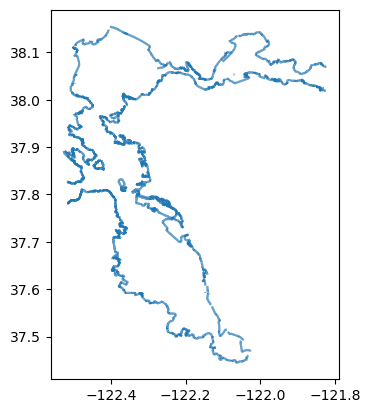

In [37]:
erosion.plot()

As you can see, without much context the data is already proving useful in a visual format. The outline of the San Francisco bay is produced. Because this data is not filtered, it is impossible to distinguish the difference between different data points other than their physical location.
___

Finally, the value_counts() command can be used to determine the frequency of occurance of a particular column. In this case, I look at the different 'Class' types and see how often each one occurs in the dataset.
___

In [38]:
erosion['Class'].value_counts()

Shoreline Protection Structure    9565
Berm                              7699
Natural Shoreline                 3664
Engineered Levee                  1313
Railroad                           937
Major Road                         774
Water Control Structure             56
Floodwall                           40
Name: Class, dtype: int64

The result of this operation is all of the different classified areas of interest sorted by frequency from top to bottom.

## Filtering
#### The data is now refined to focus on a particular interest
___

I create a desired_columns variable that contains a list of the columns I want to look at.

In [42]:
desired_columns = ['Bayshore_Defense','Wave_Energy','Wave_Energy_Descriptive','Frontage_SecondLine_Descriptive','geometry']

The list is saved to the variable desired_columns. This will then be copied to a new variable to be worked on indpendent from the original dataset. The copy will be assigned to the variable 'erosion_trimmed'

In [99]:
erosion_trimmed = erosion[desired_columns].copy()
erosion_trimmed.head().sample(3)

Bayshore_Defense  Wave_Energy Wave_Energy_Descriptive  \
1  First line of shoreline defense         14.0      High Vulnerability   
2  First line of shoreline defense         19.0   Highest Vulnerability   
3  First line of shoreline defense         19.0   Highest Vulnerability   

  Frontage_SecondLine_Descriptive  \
1          Moderate Vulnerability   
2          Moderate Vulnerability   
3          Moderate Vulnerability   

                                            geometry  
1  MULTILINESTRING ((-122.46517 37.98434, -122.46...  
2  MULTILINESTRING ((-122.46365 37.98217, -122.46...  
3  MULTILINESTRING ((-122.46392 37.98235, -122.46...

Again, using the .sample() command, I have confirmation a segment of the original dataset has been refined to only display my desired columns.
___

#### Further refinement
Even with limited columns, the dataset still contained over 24,000 rows. This really slows down mapping capabilities, and provides an opportunity to look at the dataset with even greater detail. Below, I create a another variable called 'erosion_trimmed_2' and locate only entries in which a specific columns (Wave_Energy_Descriptive) equals a sepcific value (Highest Vulnerability).

In [100]:
erosion_trimmed_2 = erosion_trimmed.loc[erosion_trimmed['Wave_Energy_Descriptive'] == 'Highest Vulnerability'].copy()

The result of this further query is that the dataset I am now using only contains entries that contain the trait of high vulnerability (to sea level rise).

___
# Making a Map

To begin, I will import folium, allowing me to work with Open Street Map data. I do this because I want to give my data geographical context.

In [71]:
import folium

I also want to establish a defualt location for the map. To do this I assign values to latitude and longitude variables. These values can later be taken by the .Map() command to be interpreted correctly.

In [105]:
latitude = 37.7
longitude = -122.28

Creating a map variable 'm' the folium map can be created with both a default location, as well as a terrain basemap that looks nice. My dataset is added to the map as a GeoJson.

In [106]:
m = folium.Map(location=[latitude,longitude], tiles='Stamen Terrain')

folium.GeoJson(erosion_trimmed_2).add_to(m)

m


The result is a map that highlights all of the areas in the San Francisco Bay deemed as highly vulnerable to sea level rise!